# This notebook is prepared by ApplAi's Technical And Training Depratment. 
- Please Don't use it outside the training without asking for permission as it's considered as Violation of Intellectual property rights

![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)

### Task 1: Importing libraries and Exploring the Dataset.

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project .

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

### Task 4: creat a model that fits the data

### Task 5: creating an accurecy table


### 

### Task 1: Importing libraries and Exploring the Dataset.

In [357]:
#importing libraries
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import DBSCAN,KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import silhouette_samples

In [358]:
#reading data
data=pd.read_csv('Mall_Customers.csv')

In [359]:
#show first 5 rows in the Dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [360]:
#finding the number of rows and columns
data.shape

(200, 5)

# Description of each feature

1. **Customer Id** :Unique id assigned to the customer (it wont affect the segmentation,so we will drop it).
2. **Gerder** :gender of the customer.
3. **Age** :Age of the customer.
4. **Annual Income (k$)** :Annual Income of the customer.
5. **Spending Score (1-100)** :Score assigned by the mall based on customer behavior and spending nature.

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project 

In [361]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [362]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Drop unnessuary columns**

In [363]:
data.drop("CustomerID",axis=1,inplace=True)

### **Exploratory Data Analysis**

## do we have more male customers or females, and who among them spends more 

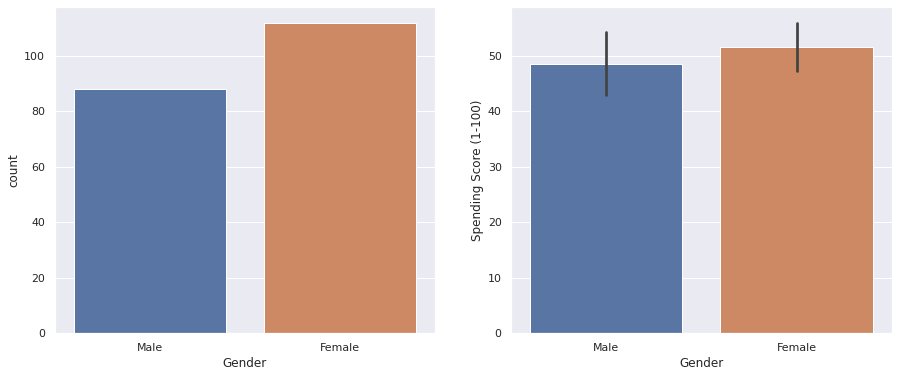

In [364]:
fig, axs = plt.subplots(1,2, figsize = (15,6))
plt1 = sns.countplot(x='Gender',data=data, ax = axs[0])
plt2 = sns.barplot(x='Gender',y='Spending Score (1-100)',data=data, ax = axs[1])
plt.show()

## **Features distribution of customers**

### **Age distribution**

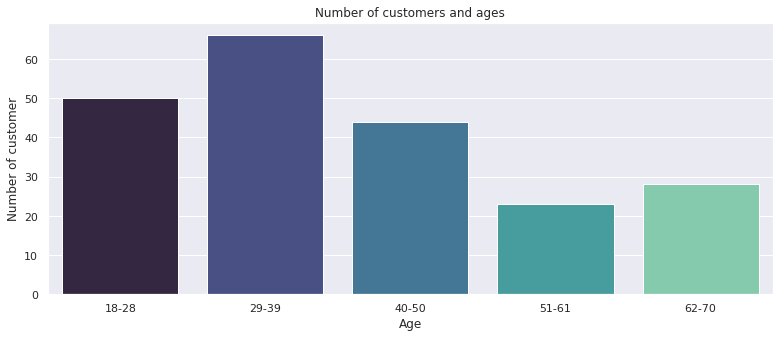

In [365]:
age_18_28 = data.Age[(data.Age >= 18) & (data.Age <= 28)]
age_29_39 = data.Age[(data.Age >= 29) & (data.Age <= 39)]
age_40_50 = data.Age[(data.Age >= 40) & (data.Age <= 50)]
age_51_61 = data.Age[(data.Age >= 51) & (data.Age <= 61)]
age_62_70 = data.Age[(data.Age >= 57) & (data.Age <= 70)]

x_age = ['18-28','29-39','40-50','51-61','62-70']
y_age = [len(age_18_28.values),len(age_29_39.values),len(age_40_50.values),len(age_51_61.values),len(age_62_70.values)]

plt.figure(figsize=(13,5))
sns.barplot(x = x_age,y = y_age,palette="mako")
plt.title("Number of customers and ages")
plt.xlabel("Age")
plt.ylabel("Number of customer")
plt.show()

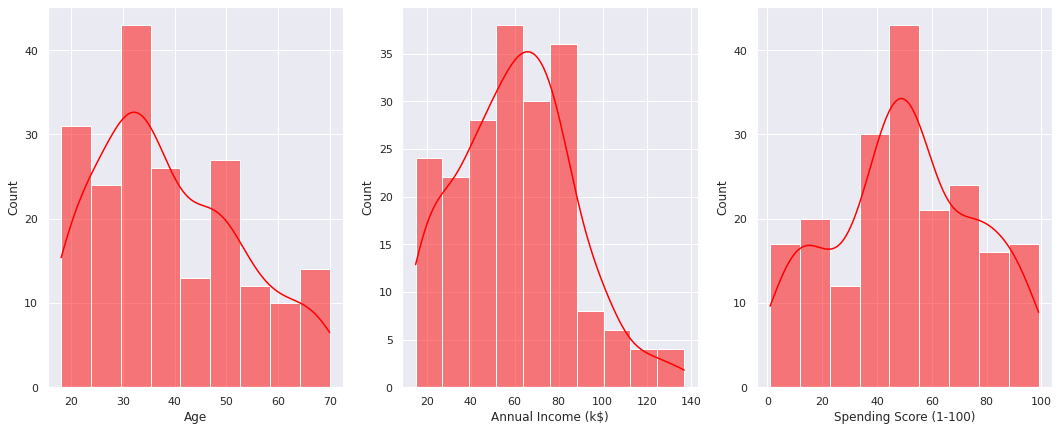

In [366]:
fig, axs = plt.subplots(1,3, figsize = (18,7))
plt1 = sns.histplot(data.Age,kde=True,color="red", ax = axs[0])
plt2 = sns.histplot(data['Annual Income (k$)'],kde=True,color="red", ax = axs[1])
plt3 = sns.histplot(data['Spending Score (1-100)'],kde=True,color="red", ax = axs[2])
plt.show()

## **how does age and annual income relate with spending score**

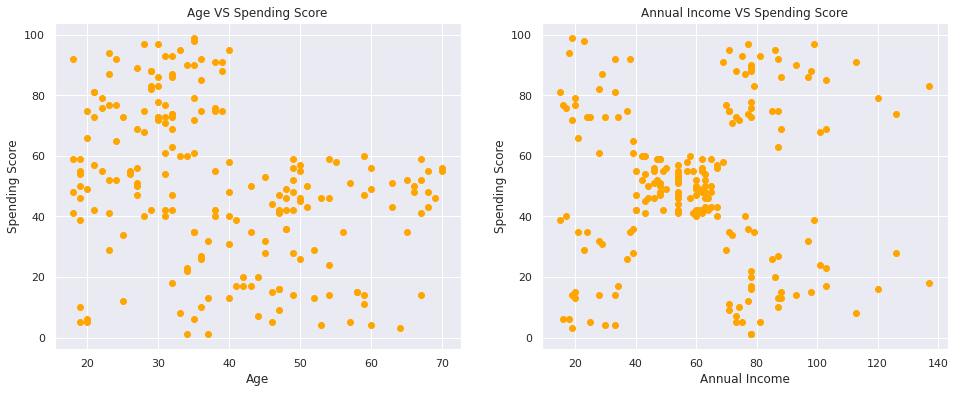

In [367]:
fig,ax=plt.subplots(1,2,figsize=(16,6))
ax[0].scatter(data['Age'],data['Spending Score (1-100)'],color='orange')
ax[0].set(xlabel='Age',ylabel='Spending Score',title='Age VS Spending Score')

ax[1].scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],color='orange')
ax[1].set(xlabel='Annual Income',ylabel='Spending Score',title='Annual Income VS Spending Score')
plt.show()

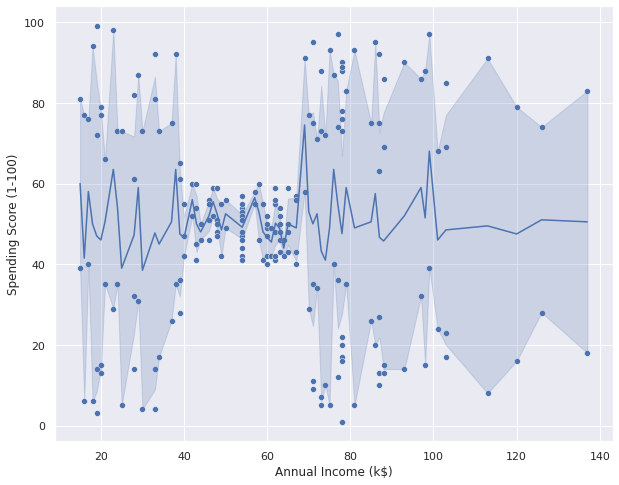

In [368]:
fig,ax=plt.subplots(figsize=(10,8))
sns.set_palette('Blues')
sns.axes_style("darkgrid")
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data,ax=ax)
sns.lineplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data,markers="o",ax=ax)

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

In [369]:
#checking for missing values
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [370]:
#getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


## **Data Encoding**

In [371]:
print(data['Gender'].unique())

['Male' 'Female']


In [372]:
l={'Male':0,'Female':1}
data['Gender']=data['Gender'].replace(l)

In [373]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


## **Detect and Remove Outliers**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


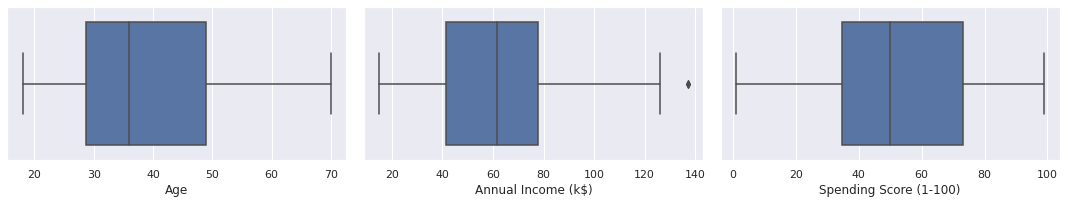

In [374]:
#checking outliers
sns.set()
fig, axs = plt.subplots(1,3, figsize = (15,3))
plt1 = sns.boxplot(data['Age'], ax = axs[0])
plt2 = sns.boxplot(data['Annual Income (k$)'], ax = axs[1])
plt3 = sns.boxplot(data['Spending Score (1-100)'], ax = axs[2])
plt.tight_layout()

In [375]:
Annual_Income_q1=data['Annual Income (k$)'].quantile(0.25)
Annual_Income_q3=data['Annual Income (k$)'].quantile(0.75)
Annual_Income_iqr=Annual_Income_q3-Annual_Income_q1

print(f"Q1 of The Annual Income is {Annual_Income_q1}")
print(f"Q3 of The Annual Income is {Annual_Income_q3}")
print(f"IQR of The Annual Income is {Annual_Income_iqr}")

Q1 of The Annual Income is 41.5
Q3 of The Annual Income is 78.0
IQR of The Annual Income is 36.5


In [376]:
Annual_Income_upper_limit = Annual_Income_q3 +(1.5 * Annual_Income_iqr)
Annual_Income_lower_limit= Annual_Income_q1 - (1.5 * Annual_Income_iqr)

print(f"The upper limit of The Annual Income is {Annual_Income_upper_limit}")
print(f"The lower limit of The Annual Income is {Annual_Income_lower_limit}")

The upper limit of The Annual Income is 132.75
The lower limit of The Annual Income is -13.25


In [377]:
data=data.loc[((data['Annual Income (k$)'] < Annual_Income_upper_limit) & (data['Annual Income (k$)'] > Annual_Income_lower_limit))]

In [378]:
data.shape

(198, 4)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


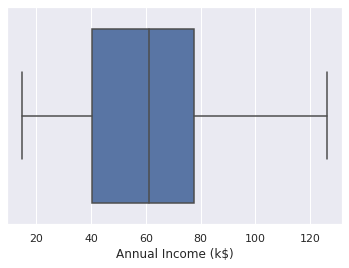

In [379]:
sns.boxplot(data['Annual Income (k$)'])

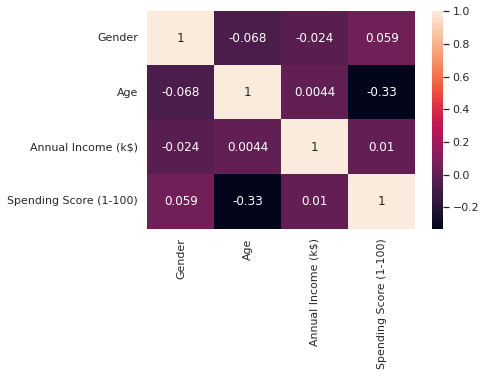

In [380]:
#visualize the corelation between the columns
data.corr()
sns.heatmap(data.corr(),annot=True)

## **Conclusion**

**the heighest correlation is between Age and Spending Score(1-100) = 0.33 and there are negativly correlated what it's mean that older customer spend less**

In [381]:
# The gender feature is not important for clustering so we will drop it
df = data.drop('Gender',axis = 1)

# **Feature Scaling**

In [382]:
columns_names=df.columns.values
stander=StandardScaler()
df_scaled=stander.fit_transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=columns_names)

In [383]:
data_scaled = df_scaled.copy()
data_scaled1 = df_scaled.copy()

In [384]:
df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.425414,-1.779171,-0.435989
1,-1.282367,-1.779171,1.199413
2,-1.353890,-1.739447,-1.720949
3,-1.139319,-1.739447,1.043661
4,-0.567131,-1.699723,-0.397051


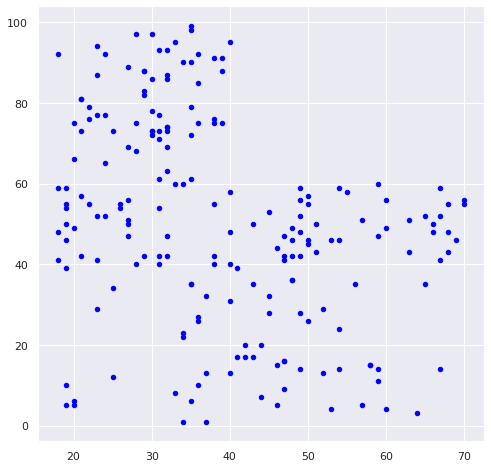

In [385]:
fig=plt.figure(figsize=(8,8))
plt.scatter(df['Age'], df["Spending Score (1-100)"], c='blue', s=20)
plt.show()

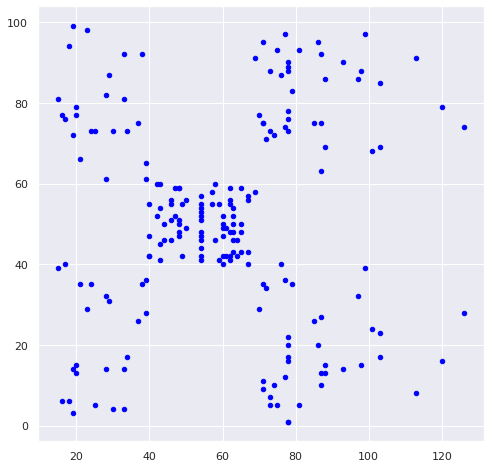

In [386]:
fig=plt.figure(figsize=(8,8))
plt.scatter(df['Annual Income (k$)'], df["Spending Score (1-100)"], c='blue', s=20)
plt.show()

### Task 4: creat a model that fits the data

# **Kmeans Algorithm**

Between Age and Spending Score

In [387]:
x1=df_scaled.loc[:,["Age","Spending Score (1-100)"]].values

In [388]:
#finding the optimal number of clusters with elbow method
wcss=[]

for k in range(2,12):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(x1)
  wcss.append(kmeans.inertia_)

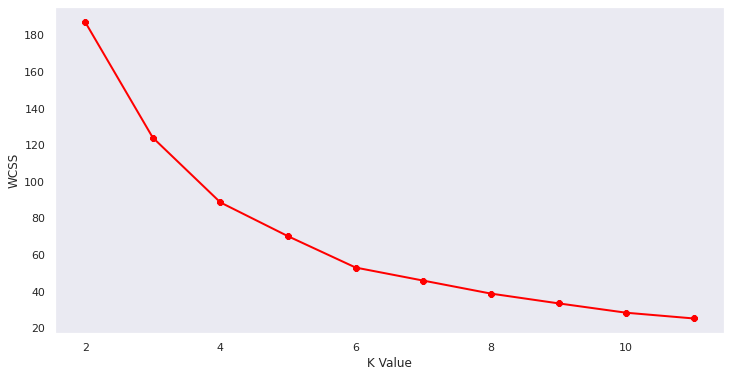

In [389]:
#plot the results for elbom method
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(2,12),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [390]:
kmeans=KMeans(n_clusters=4)
label=kmeans.fit_predict(x1)

print(label)

[0 2 0 2 0 2 3 2 3 2 3 2 3 2 3 2 0 2 3 2 0 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 1 2 3 2 3 2 1 0 0 0 1 2 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 0 2 1 1 0 1 3 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 2 2 0 2 3 2 3 2 3 2 0 2 0 2 3 2 0 2 3 2 0 2 0 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 1 2 0 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [391]:
print(kmeans.cluster_centers_)

[[-0.96051057 -0.30897684]
 [ 1.24479858 -0.04401192]
 [-0.61742109  1.15134908]
 [ 0.50724378 -1.24954845]]


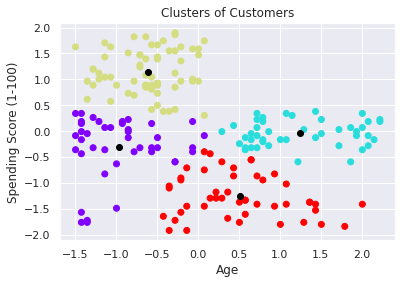

In [392]:
plt.scatter(x1[:,0,],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

Between Annual Income and Spending Score

In [393]:
x2=df_scaled.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values

In [394]:
#finding the optimal number of clusters with elbow method
wcss=[]

for k in range(2,12):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(x2)
  wcss.append(kmeans.inertia_)

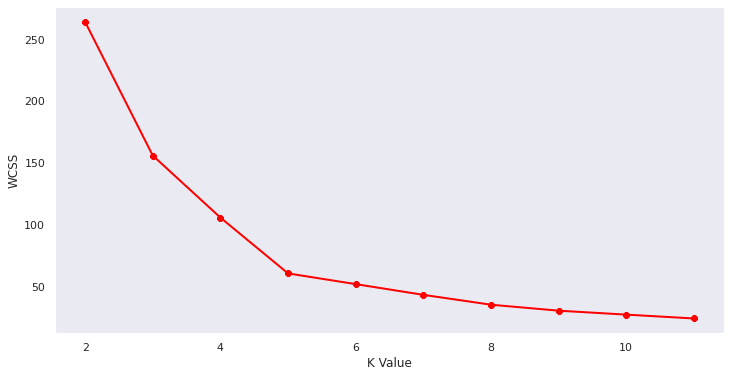

In [395]:
#plot the results for elbom method
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(2,12),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [396]:
kmeans=KMeans(n_clusters=5)
label=kmeans.fit_predict(x2)

print(label)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 0 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 0 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 0 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [397]:
print(kmeans.cluster_centers_)

[[-0.18671971 -0.01886436]
 [-1.33011303 -1.14026225]
 [ 1.0098993   1.24245028]
 [ 1.05488046 -1.27037859]
 [-1.35303699  1.13569638]]


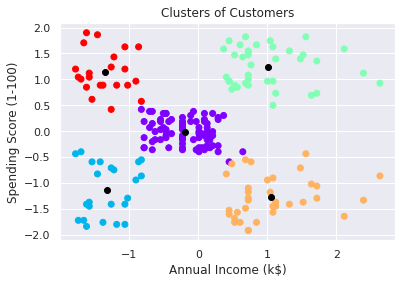

In [398]:
plt.scatter(x2[:,0,],x2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

For all Columns

In [399]:
x3=df_scaled.iloc[:,0:].values

In [400]:
#finding the optimal number of clusters with elbow method
wcss=[]
for k in range(2,12):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(x3)
  wcss.append(kmeans.inertia_)

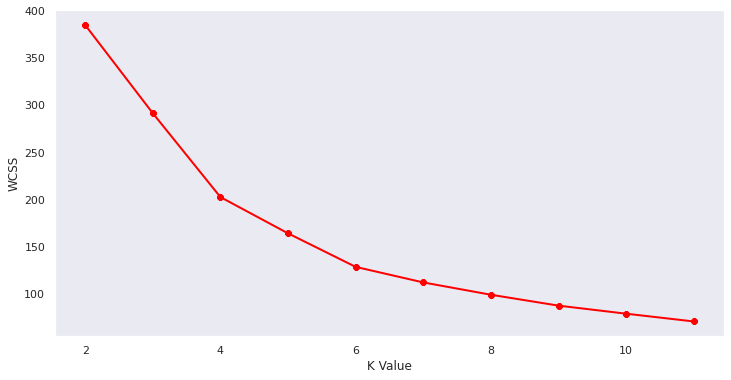

In [401]:
#plot the results for elbom method
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(2,12),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

Evaluation with Silhouette Score

In [402]:
x3=df_scaled.iloc[:,0:].values

silhouette = {}
for k in range(2,12):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(x3)
  silhouette[k] = silhouette_score(x3, kmeans.labels_)
  print(f'k = {k},score = {silhouette[k]}')

k = 2,score = 0.33407023028736504
k = 3,score = 0.3562918883931326
k = 4,score = 0.4057458871039933
k = 5,score = 0.4211865917376424
k = 6,score = 0.4338361973846591
k = 7,score = 0.42280502136858905
k = 8,score = 0.4129676594676486
k = 9,score = 0.42444012837309836
k = 10,score = 0.4024923537371543
k = 11,score = 0.4001337308963319


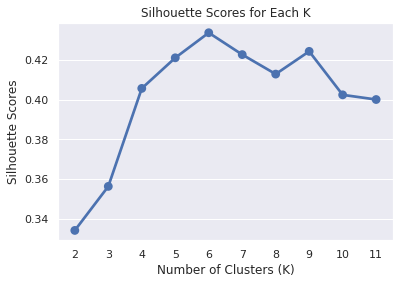

In [403]:
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Each K")
plt.show()

In [404]:
#The heighest Score of KMeans is 0.4334778776406824 where K=6
kmeans=KMeans(n_clusters=6)
label=kmeans.fit_predict(x3)

print(label)

[3 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 0 3 4 5 4 3 0 5 5 5 0 5 5 0 0 0 0 0 5 0 0 5 0 0 0 5 0 0 5 5 0 0 0 0
 0 5 0 5 5 0 0 5 0 0 5 0 0 5 5 0 0 5 0 5 5 5 0 5 0 5 5 0 0 5 0 5 0 0 0 0 0
 5 5 5 5 5 0 0 0 0 5 5 5 1 5 1 2 1 2 1 2 1 5 1 2 1 2 1 2 1 2 1 5 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [405]:
print(kmeans.cluster_centers_)

[[ 1.24479858 -0.21932681 -0.04401192]
 [-0.44102381  1.0098993   1.24245028]
 [ 0.18711714  1.08218883 -1.30324847]
 [-0.99627234 -1.37156457  1.06736221]
 [ 0.47166317 -1.33085323 -1.19991906]
 [-0.85322526 -0.12433672 -0.04148436]]


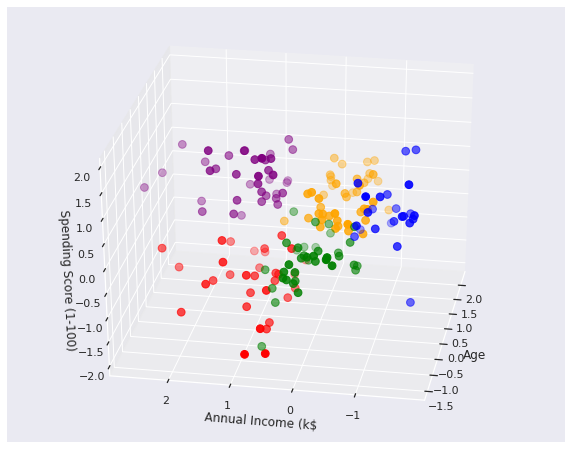

In [406]:
clusters=kmeans.fit_predict(x3)
df_scaled['label']=clusters
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df_scaled.Age[df_scaled.label==0],df_scaled['Annual Income (k$)'][df_scaled.label==0],df_scaled['Spending Score (1-100)'][df_scaled.label==0],c='blue',s=60)
ax.scatter(df_scaled.Age[df_scaled.label==1],df_scaled['Annual Income (k$)'][df_scaled.label==1],df_scaled['Spending Score (1-100)'][df_scaled.label==1],c='red',s=60)
ax.scatter(df_scaled.Age[df_scaled.label==2],df_scaled['Annual Income (k$)'][df_scaled.label==2],df_scaled['Spending Score (1-100)'][df_scaled.label==2],c='green',s=60)
ax.scatter(df_scaled.Age[df_scaled.label==3],df_scaled['Annual Income (k$)'][df_scaled.label==3],df_scaled['Spending Score (1-100)'][df_scaled.label==3],c='orange',s=60)
ax.scatter(df_scaled.Age[df_scaled.label==4],df_scaled['Annual Income (k$)'][df_scaled.label==4],df_scaled['Spending Score (1-100)'][df_scaled.label==4],c='purple',s=60)
ax.view_init(30,190)

plt.xlabel('Age')
plt.ylabel('Annual Income (k$')   
ax.set_zlabel('Spending Score (1-100)')
plt.show()

# DBSCAN Algorithm

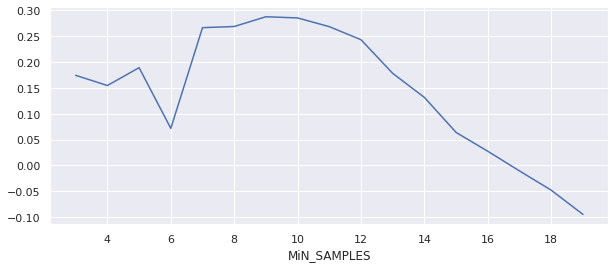

In [407]:
sh_score = []
for num in range(3,20):
  dpscan = DBSCAN(eps = 0.6,min_samples = num)
  dpscan.fit(data_scaled)
  dp_labels = dpscan.labels_
  score = metrics.silhouette_score(data_scaled,dp_labels)
  sh_score.append(score)
plt.figure(figsize =(10,4))
plt.plot(list(range(3,20)),sh_score)
plt.xlabel('MiN_SAMPLES')
plt.show()

In [408]:
sh_score = []
eps = [0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.67]
e = []
n = []
for num in range(1,20):
  for ep in eps: 
    dpscan = DBSCAN(eps = ep,min_samples = num)
    dpscan.fit(data_scaled)
    dp_labels = dpscan.labels_
    if(len(set(dp_labels)) > 1):
      score = metrics.silhouette_score(data_scaled,dp_labels)
      sh_score.append(score)
      e.append(ep)
      n.append(num)

In [409]:
x = sh_score.index(max(sh_score))
print("highest score is ",max(sh_score)," at eps = ",e[x]," and minimum samples = ",n[x])

highest score is  0.29682418519732723  at eps =  0.62  and minimum samples =  10


DBSCAN with best eps and min_samples

In [410]:
dpscan_model = DBSCAN(eps = 0.62,min_samples = 10)
dpscan_model.fit(data_scaled)
dpscan_labels = dpscan_model.labels_
#counting number of groups
num_clusters = len(set(dpscan_labels))-(1 if -1 in dpscan_labels else 0)
print("Number of groups is ",num_clusters)

Number of groups is  4


## **how does the clusters relate with the features**

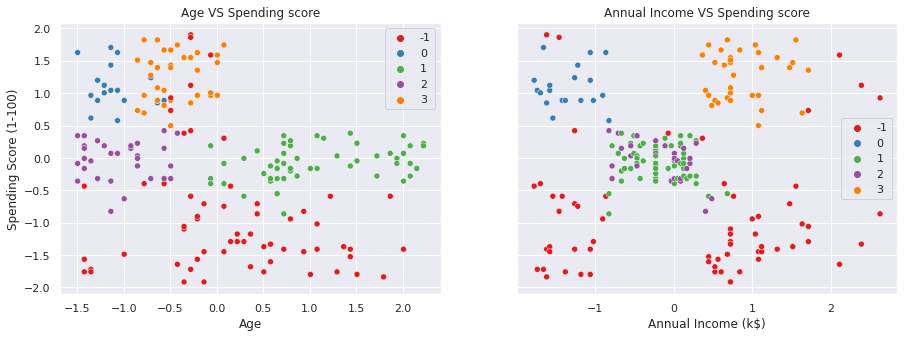

In [411]:
fig,axes = plt.subplots(1,2,figsize=(15,5),sharey=True)
sns.scatterplot(x=data_scaled.Age,y=data_scaled['Spending Score (1-100)'],hue=dpscan_labels,palette='Set1',ax=axes[0])
axes[0].set_title('Age VS Spending score')

sns.scatterplot(x=data_scaled['Annual Income (k$)'],y=data_scaled['Spending Score (1-100)'],hue=dpscan_labels,palette='Set1',ax=axes[1])
axes[1].set_title('Annual Income VS Spending score')
plt.show()

## **Hierarchical Algorithm**

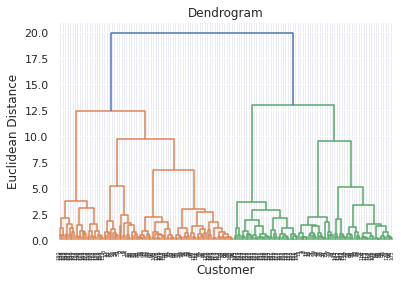

In [412]:
# finding optimal number of clusters using dendrogram
dendrogram = sch.dendrogram(sch.linkage(data_scaled,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean Distance')
plt.show()

In [413]:
hc = AgglomerativeClustering(n_clusters = 4,affinity='euclidean',linkage='ward')
hc.fit_predict(data_scaled)

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       1, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2])

In [414]:
hc1 = hc.fit_predict(data_scaled)

In [415]:
metrics.silhouette_score(data_scaled,hc1)

0.36912527987347593

# **Task 5: creating an accurecy table**

### **For KMEAN**

### **For DBSCAN**

In [416]:
dp_score = metrics.silhouette_score(data_scaled,dpscan_labels)
print("the silhouette score is ",dp_score)

the silhouette score is  0.29682418519732723


### **For Hierarchical**

In [417]:
hc_score = metrics.silhouette_score(data_scaled,hc1)
print("the silhouette score is ",hc_score)

the silhouette score is  0.36912527987347593


## **Comparision**

         KM        HC   k
0  0.334070  0.320484   2
1  0.356292  0.339119   3
2  0.405723  0.369125   4
3  0.421187  0.400690   5
4  0.433836  0.425948   6
5  0.422805  0.415557   7
6  0.411986  0.428048   8
7  0.421592  0.415389   9
8  0.398458  0.407623  10
9  0.406449  0.388417  11


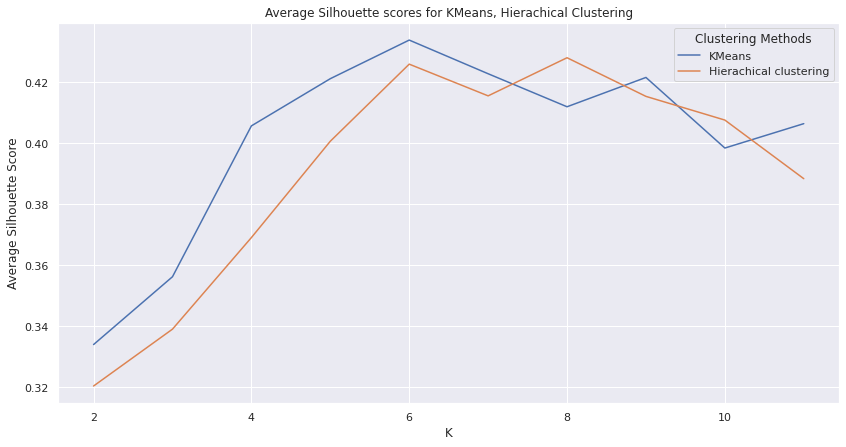

In [418]:
avg_silhouette_scores = []

for k in range(2,12):

    # Run the KMeans algorithm
    km = KMeans(n_clusters=k)
    km_labels = km.fit_predict(data_scaled1)

    # Run the Hierachical clustering algorithm
    hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(data_scaled)
    hc_labels = hc.labels_

    # calculate average silhouette scores
    km_silhouette_vals = silhouette_samples(data_scaled1, km_labels)
    hc_silhouette_vals = silhouette_samples(data_scaled, hc_labels)
    km_avg_score = np.mean(km_silhouette_vals)
    hc_avg_score = np.mean(hc_silhouette_vals)
    avg_silhouette_scores.append([km_avg_score, hc_avg_score])
df_avg_silhouette_scores = pd.DataFrame(avg_silhouette_scores, columns = ['KM', 'HC'])
df_avg_silhouette_scores["k"] = range(2,12)
print(df_avg_silhouette_scores)


# plot male and female left-handedness rates vs. age
fig, ax = plt.subplots() # create figure and axis objects
fig.set_size_inches(14, 7)
ax.set_title('Average Silhouette scores for KMeans, Hierachical Clustering')
ax.plot('k', 'KM', data=df_avg_silhouette_scores) 
ax.plot('k', 'HC', data=df_avg_silhouette_scores) 

ax.legend(['KMeans',"Hierachical clustering"], title="Clustering Methods") # add a legend
ax.set_xlabel('K')
ax.set_ylabel("Average Silhouette Score");

**Conclusion**

* KMeans performs best when K=6 and score = 0.433836
* Hierarchical clustering performs best when K=8 and score = 0.428048

Conclusion of model choosing : KMeans with K=6


In [419]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([data,pd.DataFrame({'Cluster':kmeans.labels_})],axis=1)
cluster_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,5
3,1,23,16,77,0
4,1,31,17,40,5
...,...,...,...,...,...
193,1,38,113,91,4
194,1,47,120,16,1
195,1,35,120,79,4
196,1,45,126,28,1


In [420]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,0
1,0,21,15,81,0
3,1,23,16,77,0
5,1,22,17,76,0
7,1,23,18,94,0
9,1,30,19,72,0
11,1,35,19,99,0
13,1,24,20,77,0
15,0,22,20,79,0
17,0,20,21,66,0


In [421]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
126,0,43,71,35,1
128,0,59,71,11,1
130,0,47,71,9,1
134,0,20,73,5,1
136,1,44,73,7,1
140,1,57,75,5,1
144,0,25,77,12,1
146,0,48,77,36,1
148,1,34,78,22,1
150,0,43,78,17,1


In [422]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
47,1,27,40,47,2
48,1,29,40,42,2
49,1,31,40,42,2
51,0,33,42,60,2
52,1,31,43,54,2
58,1,27,46,51,2
61,0,19,46,55,2
65,0,18,48,59,2
68,0,19,48,59,2
69,1,32,48,47,2


In [423]:
cluster_4_df = cluster_df[cluster_df["Cluster"] == 3]
cluster_4_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
40,1,65,38,35,3
46,1,50,40,55,3
50,1,49,42,52,3
53,0,59,43,60,3
54,1,50,43,45,3
55,0,47,43,41,3
56,1,51,44,50,3
57,0,69,44,46,3
59,0,53,46,46,3
60,0,70,46,56,3


In [424]:
cluster_5_df = cluster_df[cluster_df["Cluster"] == 4]
cluster_5_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,0,39,69,91,4
125,1,31,70,77,4
127,0,40,71,95,4
129,0,38,71,75,4
131,0,39,71,75,4
133,1,31,72,71,4
135,1,29,73,88,4
137,0,32,73,73,4
139,1,35,74,72,4
141,0,32,75,93,4


In [425]:
cluster_6_df = cluster_df[cluster_df["Cluster"] == 5]
cluster_6_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
2,1,20,16,6,5
4,1,31,17,40,5
6,1,35,18,6,5
8,0,64,19,3,5
10,0,67,19,14,5
12,1,58,20,15,5
14,0,37,20,13,5
16,1,35,21,35,5
18,0,52,23,29,5
20,0,35,24,35,5


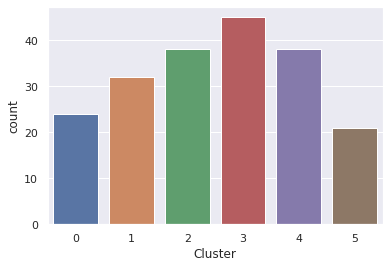

In [426]:
#Visualization
sns.countplot(x='Cluster', data=cluster_df)

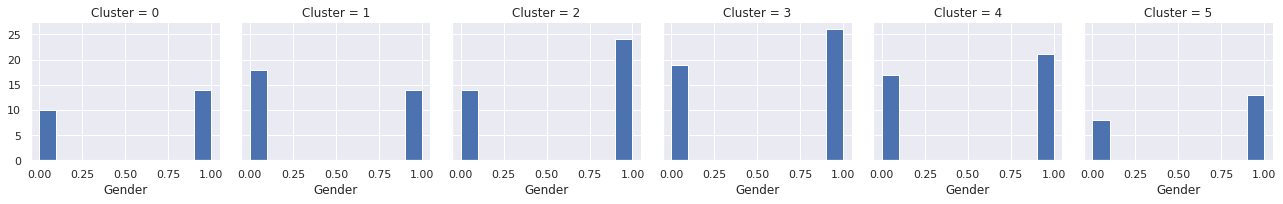

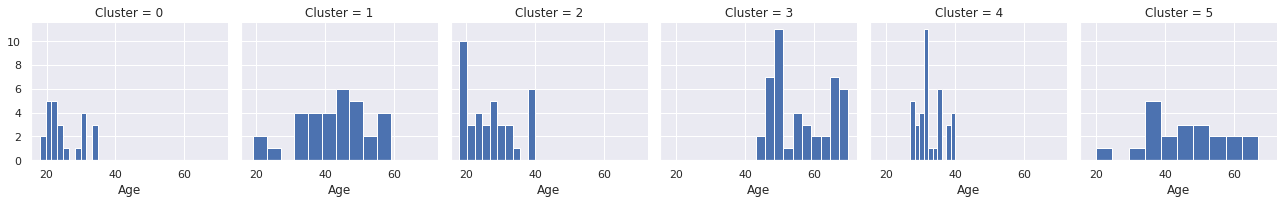

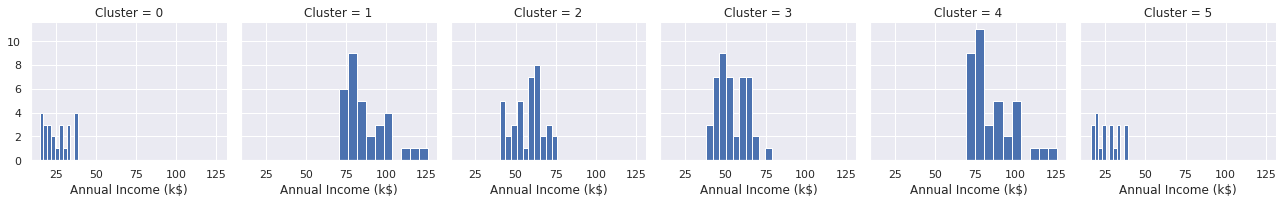

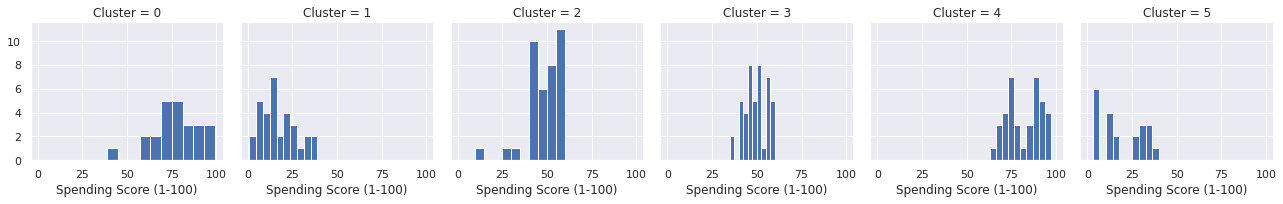

In [427]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

We decided to name each group in this way:


*  Group 0:Middle-income Middle-spending old age
*  Group 1:High-income Low-spending middle age
*  Group 2:Middle-income Middle-spending young age
*  Group 3:High-income High-spending middle age
*  Group 4:Low-income Low-spending Middle age
*  Group 5:Low-income High-spending Young age

**Possible Growth Strategies**

**1-Group 0:**

Given the limited amount of information, I assume they are long-time customers already, so their purchasing behavior won’t be changed that much in the future, so keeping them loyal is this group's main strategy.

**2-Group 1:**

These customers mostly shop in more developed mall, so we must develop our own shopping mall or do things to attract their attention

**3-Group 2:**

this group is similar to group 0, except the average age is way younger and female customers are more, accounting for 63% of customers in this group. The main strategy is also a loyalty program, but with a focus on female products


**4-Group 3:**

as they have the ability to spend money, we can also try to sell  more high-end brands and asking them to refer their friends to our mall might be a good idea. Besides, their friends might also be rich and high-spend

**5-Group 4:**

There is no strategy for this group but we should know why they spend so little.

**6-Group 5:**

we can tell they really love our mall as they are low-income, but spent a lot on us ,they might value discounts more than other groups, given their financial situation. And they are at a young age, meaning that they are more likely to share things on social media or invite their friends to a product.

## Saving the kmeans clustering model and the data with cluster label

In [428]:
file="Mall Customers.sav"
pickle.dump(kmeans,open(file,'wb'))

In [429]:
cluster_df.to_csv("Customer_Data.csv")